# Problem Statemet
Perform activity recognition on the dataset using a hidden markov model. Then perform the
same task using a different classification algorithm (logistic regression/decision tree) of your
choice and compare the performance of the two algorithms

Dataset Link: Human Activity Recognition with Smartphones
https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

Recognizing human activities from temporal streams of sensory data observations is a
very important task on a wide variety of applications in context recognition. Human activities
are hierarchical in nature, i.e. the complex activities can be decomposed to several simpler
ones. Human activity recognition is the problem of classifying sequences of accelerometer
data recorded by pre-installed sensors in smart phones into known well-defined
movements to make it ready for predictive modelling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
print('Number of duplicates in train : ',sum(train.duplicated()))
print('Number of duplicates in test : ', sum(test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test :  0


In [5]:
print('Total number of null values in train:',train.isna().values.sum())
print('Total number of null values in test:',test.isna().values.sum())

Total number of null values in train: 0
Total number of null values in test: 0


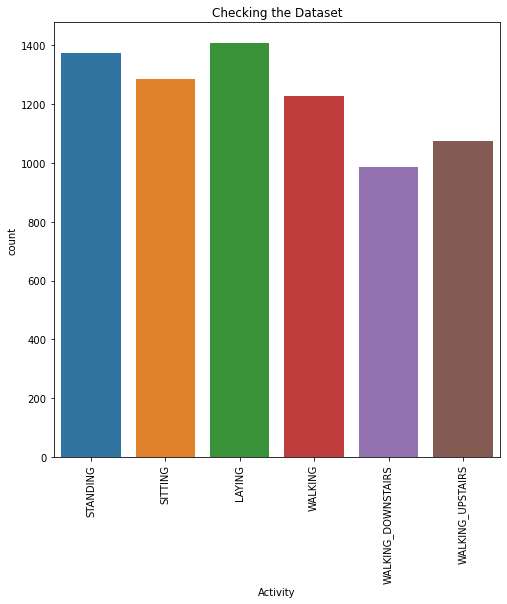

In [37]:
# Checking wether the classs are imbalanced or not
plt.figure(figsize =(8,8))
sns.countplot(train['Activity'])
plt.title('Checking the Dataset')
plt.xticks(rotation = 90)
plt.show()

There is almost same number of observations across all the six activities so this data does not have class imbalance problem.

# EDA

Based on the common nature of activities we can broadly put them in two categories.

Static and dynamic activities :

1)SITTING, STANDING, LAYING can be considered as static activities with no motion involved

2)WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved

Let's consider tBodyAccMag-mean() feature to differentiate among these two broader set of activities.

If we try to build a simple classification model to classify the activity using one variable at a time then probability density function(PDF) is very helpful to assess importance of a continuous variable.

Text(0.1, 9, 'Dynamic Activities')

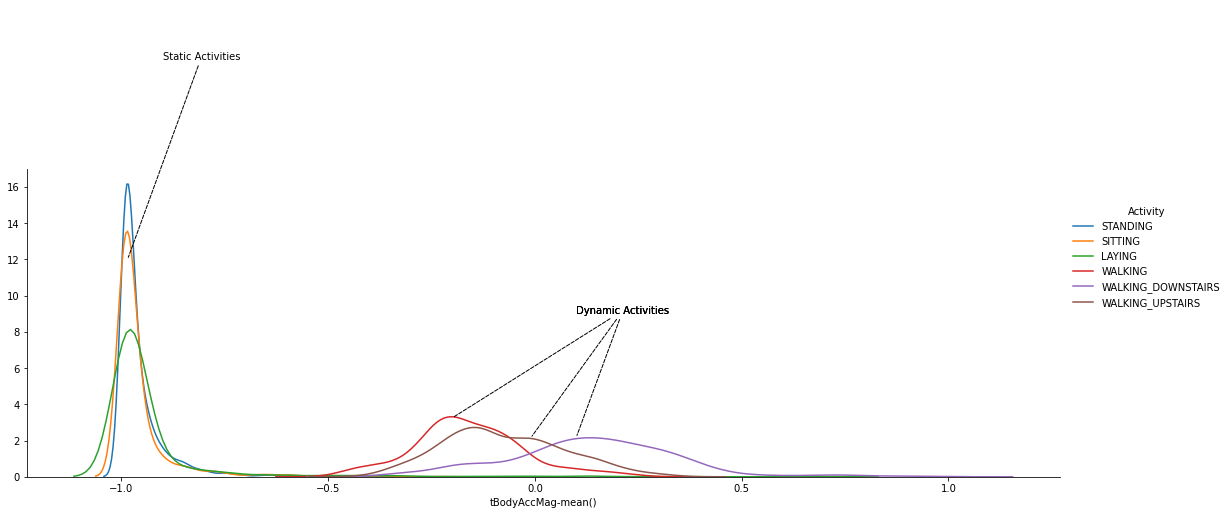

In [7]:
facetgrid = sns.FacetGrid(train, hue='Activity', height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Static Activities", xy=(-.996,21), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-.990,26), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-0.985,12), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

Using the above density plot we can easily come with a condition to seperate static activities from dynamic activities.


if(tBodyAccMag-mean()<=-0.5):
    Activity = "static"
else:
    Activity = "dynamic"

Let's have a more closer view on the PDFs of each activity under static and dynamic categorization.

<AxesSubplot:title={'center':'Dynamic Activities(closer view)'}, xlabel='tBodyAccMag-mean()', ylabel='Density'>

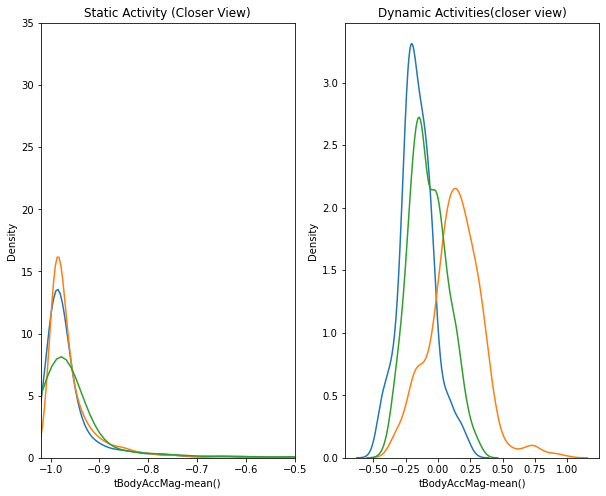

In [8]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title("Static Activity (Closer View)")
sns.distplot(train[train['Activity']=='SITTING']['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train['Activity']=='STANDING']['tBodyAccMag-mean()'],hist = False, label = 'STANDING')
sns.distplot(train[train['Activity']=='LAYING']['tBodyAccMag-mean()'],hist = False, label = 'LAYING')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')

The insights obtained through density plots can also be represented using Box plots. Let's plot the boxplot of Body Accelartion Magnitude mean(tBodyAccMag-mean()) across all the six categories.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

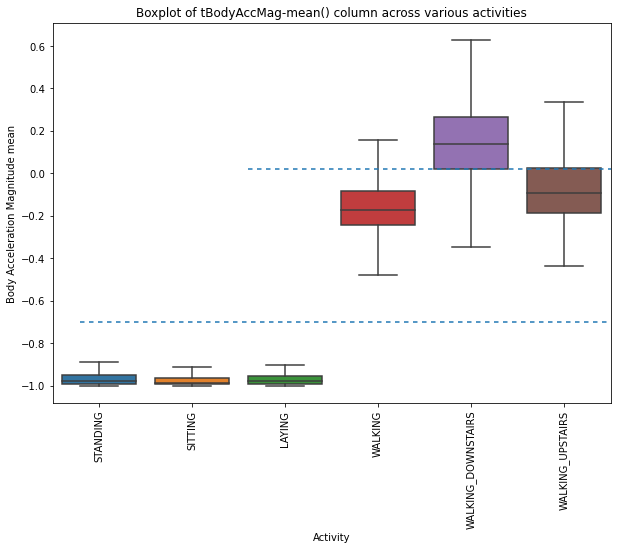

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=90)

Using boxplot again we can come with conditions to seperate static activities from dynamic activities.

if(tBodyAccMag-mean()<=-0.8):
    Activity = "static"
if(tBodyAccMag-mean()>=-0.6):
    Activity = "dynamic"
Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

if(tBodyAccMag-mean()>0.02):
    Activity = "WALKING_DOWNSTAIRS"
else:
    Activity = "others"
But still 25% of WALKING_DOWNSTAIRS observations are below 0.02 which are misclassified as others so this condition makes an error of 25% in classification.

Analysing Angle between X-axis and gravityMean feature

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

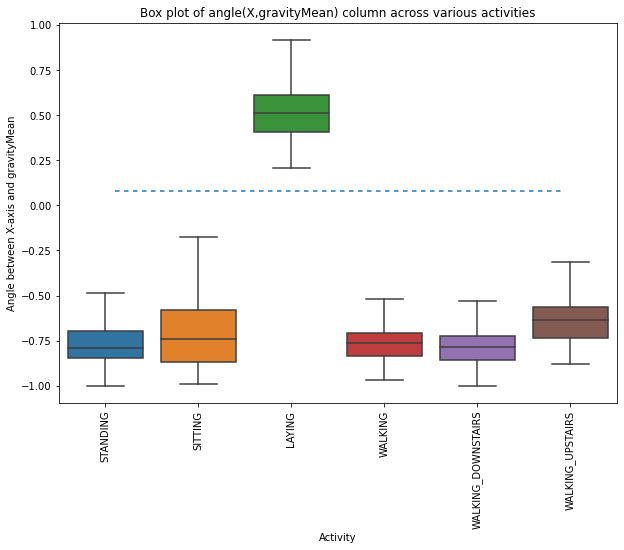

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 90)

Analysing Angle between Y-axis and gravityMean feature

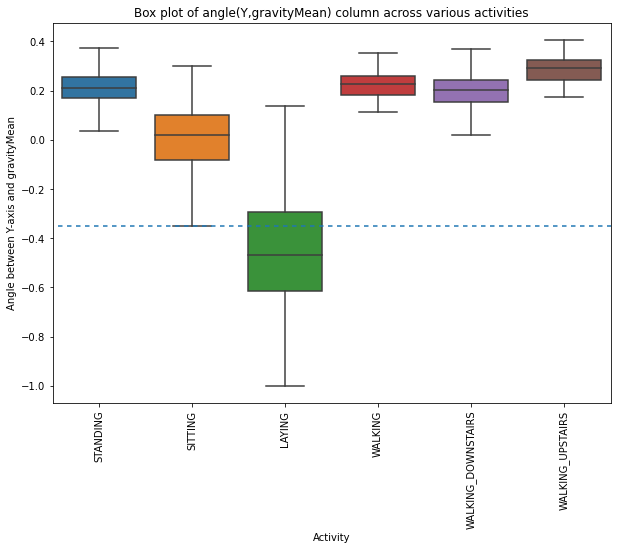

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))

Similarly, using Angle between Y-axis and gravityMean we can seperate LAYING from other activities but again it leads to some misclassification error.

## Visualizing data using t-SNE
Using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

In [38]:
from sklearn.manifold import TSNE

In [39]:
X_for_tsne = train.drop(['subject', 'Activity'], axis=1)

In [40]:
%time
tsne = TSNE(random_state = 32, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

Wall time: 0 ns
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.009s...
[t-SNE] Computed neighbors for 7352 samples in 3.461s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.122711
[t-SNE] KL divergence after 1000 iterations: 1.282488


<AxesSubplot:>

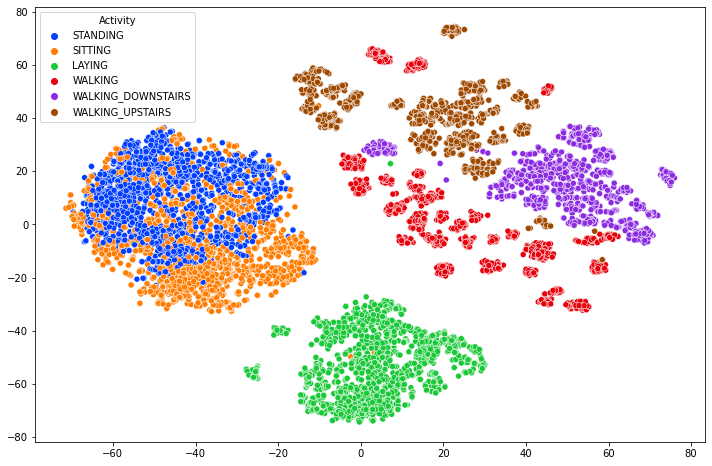

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")

Using the two new components obtained through t-SNE we can visualize and seperate all the six activities in a 2D space.

# ML models
Getting training and test data ready¶

In [43]:
y_train = train.Activity
X_train = train.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity
X_test = test.drop(['subject', 'Activity'], axis=1)
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (2947, 561)


In [44]:
y_train

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

Logistic regression model with Hyperparameter tuning and cross validation

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [46]:
parameters = {'C':np.arange(10,61,10), 'penalty':['l2','l1']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier,param_distributions=parameters,cv=5,random_state=42)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

In [47]:
y_pred

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [48]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.9565659993213438


In [49]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

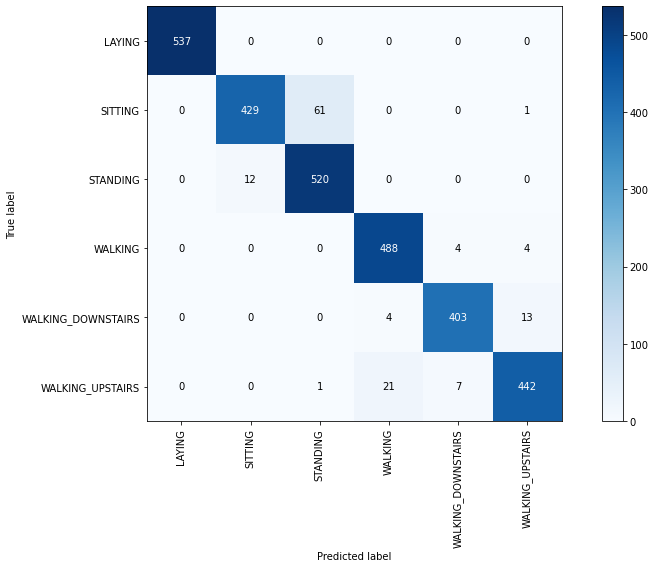

In [50]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))  # plotting confusion matrix

In [51]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [52]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(C=60)
Best set of parameters :  {'penalty': 'l2', 'C': 60}
Best score :  0.9352626053820577


In [53]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

In [54]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)


Accuracy using Decision tree :  0.8561248727519511


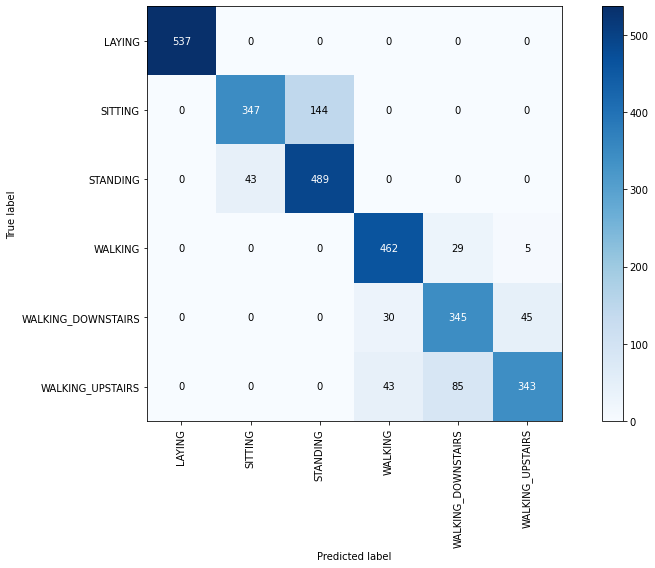

In [55]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [56]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=6)
Best set of parameters :  {'max_depth': 6}
Best score :  0.8501108505944867


In [57]:
from hmmlearn import hmm
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)

In [58]:
model.fit(X_train)

GaussianHMM(covariance_type='full', n_components=3, n_iter=100)

In [59]:
y_pred_hmm = model.predict(X_test)

In [60]:
np.unique(y_pred_hmm)

array([0, 1, 2], dtype=int64)